# Statistics Primer

## Introduction

In this session we're going to grapple with two new challenges: (1) programming in Python and (2) statistics. Thankfully, (1) is extremely straightforward because you will just be *running* code, rather than writing it. (2) Is where we will need to focus our efforts. It is worth this dedication, though, because without a good understanding of the relevant statistical concepts, understanding of (climate) risk analysis can be difficult to say the least. 

For today's session, we are going to evaluate the extreme heat hazard for London, **defining a "hazard" as a day on which the maximum air temperature exceeds 30$^{\circ}$C**

By the end of this session you will have estimated the expected number of heat hazards for London in a decade, using: 

[1] A simple non-parametric method;

[2] Fitting and querying a probability distribution (parametric analysis)

We will address these learning objectives by following this "Jupyter Notebook": an interactive story, with normal text in some places (like in this 'cell'), and Python computer code elsewhere. To make the most of this resource, you must indeed *treat it like a story* -- read everything in the order it's presented, and run the code when told to do so. It is fine to work with one of your coursemates to discuss the notebook as you progress. I also encourage you to ask questions if you get stuck or want to know more. 


## Getting started 

Let's begin, then, by running the code below. It sets up everything we need to begin analysis (and prints a congratulations message to screen, so that you know everything worked). 

**You 'run' a cell by either pressing the 'play' button at the top of the browser window (the button looks like a triangle on its side); or you can press ctrl + shift + enter on your keyboard (after clicking in the target cell**). 

In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from math import *
import warnings
from scipy import stats
warnings.filterwarnings("ignore")
%matplotlib inline
print("Well done. You just executed some Python code!")

Well done. You just executed some Python code!


If you saw a little congratulatory message, good job -- everything is ready to roll. 

We will now start analysing some data. The code below imports a 121-year record of daily maximum temperatures from London, before plotting it in the form of a histogram. Recall from the lecture that this is a type of special bar graph that shows the frequency of values with different magnitudes. Below we show this in the form of a "normalised" frequency, with the heights of the bars reduced so their areas sum to 1. 

Run the code below now to import the data and plot the histogram.

Text(0, 0.5, 'Normalised frequency')

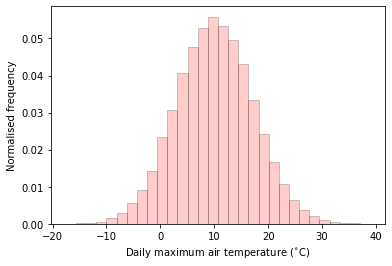

In [2]:
daily=pd.read_csv("Data/DayT.csv",index_col=0)
fig,ax=plt.subplots(1,1)
fig.set_size_inches(6,4)
h1=ax.hist(daily.values[:],bins=30,facecolor="red",alpha=0.2,edgecolor='black',density=True)
ax.set_xlabel("Daily maximum air temperature ($^{\circ}$C)")
ax.set_ylabel("Normalised frequency")

A histogram should have appeared on the page. Immediately you should be able to see that that the arithmetic average (the mean) is about 10$^{\circ}$C, and values exceeding 30$^{\circ}$C appear to be very rare. We will establish exactly how rare in what follows.


## A non-parametric estimate of hazard frequency

Recall that, under the frequentist model of probability, the probability ($p$) of an event can be estimated directly from observed data as the number of 'hits'($h$) divided by the number of opportunities for a 'hit' (aka the number of 'trials', $t$): 

\begin{align}
p = \frac{h}{t}
\end{align}

Re-arranging, we can see that the expected number of hits is equal to the probability of an event, multiplied by the number of trials: 

\begin{align}
h = p \times t
\end{align}


Let's now gather the numbers we need to evaluate the expected number of events. Run the code below to obtain the number of 'hits' and 'trials'. 

In [3]:
nhits=np.sum(daily.values[:]>30)
ntrials=np.float(len(daily.values[:]))
print("Number of hits: %.0f" % nhits)
print("Number of trials: %.0f"%ntrials)

Number of hits: 126
Number of trials: 44195


Use the above to answer the questions below. (Note that answers to all questions in this notebook are provided at the end of this notebook. Some are also 'revealed' in explanatory text before reaching the end of the notebook). 

* Q1. What, then, is the probability of recording a heat hazard in London on any given day?


* Q2. How many heat hazards in London should we expect to occur in a 10-year period? 

## A parametric estimate of hazard frequency

As explained in the lecture, whilst empirical (non-parametric) estimates of hazard frequency are very easy to calculate, they are limited in some respects. 

First, the probability of events whose magnitude exceeds the highest observation is *zero* (meaning they are regarded as impossible). To appreciate why this is a problem, imagine estimating how many students at KCL are taller than 2 metres (the total number of hits across all students in the College) -- based on the the number of exceedances in *this* class. If no students taller than 2 metres existed in our sample (which is a plausible outcome), *we would conclude that not a single student in the entire College was above this threshold* (which intuition tells us is wrong). 

Second, empirical estimates of probabilities can be very sensitive to *sampling variation* -- increasingly so as the sample size becomes smaller. That is, our estimates of how probable an event is (e.g., the chance of someone's height exceeding 2 metres, or the occurrence of a daily maximum temperature exceeding 30$^{\circ}$C) is strongly steered by which observations are randomly included. 

*Parametric* methods -- specifically the identification and fitting of a probability distribution -- can help us with both issues raised above. In essence, we want to find a probability distribution that a) is conceptually matched to the data generating process; b) agrees well with the observed histogram. 

Below, we re-plot the daily maximum temperatures and overlay the *probability density* from a well-known probability distribution (with a dashed black line). 

* Q3. What is the name of this distribution?

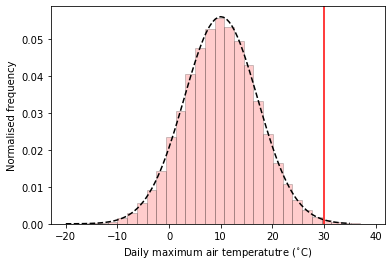

In [4]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches(6,4)
h1=ax.hist(daily.values[:],bins=30,facecolor="red",alpha=0.2,edgecolor='black',density=True)
x=np.linspace(-20,35,100)
ref=stats.norm.pdf(x,loc=daily.mean(),scale=daily.std())
ax.plot(x,ref,color='k',linestyle="--")
ax.set_xlabel("Daily maximum air temperatutre ($^{\circ}$C)")
ax.set_ylabel("Normalised frequency")
ax.axvline(30,color='red')

In this instance, the candidate probability distribution (the dashed black line) matches the observed histogram exceptionally well. Such close agreement is rare in the real world!

The plot above includes a reference vertical line at 30$^{\circ}$C (our definition of a heat hazard). To evaluate the (parametric) probability of exceeding this threshold is equivalent to finding the *area* under the dashed curve; the non-parametric analogue is to find the area of the bars to the right of this line. 

If any of you are familiar with calculus, you will recognise that 'finding the area under a curve' means 'integrating'. The integral of the probability density function is known as the *cumulative distribution function* (CDF). The CDF for the distribution selected here is shown below, plotted on the *right-hand y-axis*; on the left-hand axis we plot 1-CDF. 

* Q4. If the CDF shows the probability of a value less than or equal to $x$, what does 1-CDF show?

Text(0.5, 0, 'Daily maximum air temperatutre ($^{\\circ}$C)')

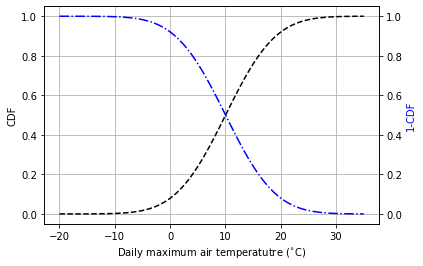

In [5]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches(6,4)
x=np.linspace(-20,35,100)
ref=stats.norm.cdf(x,loc=daily.mean(),scale=daily.std())
cdf=stats.norm.cdf(x,loc=daily.mean(),scale=daily.std())
ax.plot(x,ref,color='k',linestyle="--")
ax2=ax.twinx()
ax2.plot(x,1-cdf,linestyle="-.",color='blue')
ax.grid()
ax.set_ylabel("CDF")
ax2.set_ylabel("1-CDF",color='blue')
ax.set_xlabel("Daily maximum air temperatutre ($^{\circ}$C)")

The CDF is very useful for us because (spoiler alert), it provides us with the probability (or proportion) of values equal to or below a given threshold. That is, once we have fitted the distribution, we can compute the CDF at any value of $x$ to evaluate the fraction of values that do not exceed it. For the probability distribution we're using here (which I've asked you to name -- the answer, recall, is at the bottom of this notebook), the equation for the CDF is: 

\begin{aligned}
d(x)=\frac{1}{2}[erf(\frac{x}{\sqrt(2)})+1]
\end{aligned}

Where $x$ has been transformed into a ["standard normal distribution"](https://mathworld.wolfram.com/StandardNormalDistribution.html) -- i.e., with a mean of 0 and a standard deviation of 1, by subtracting the mean of $x$ ($\mu$) from each value, and then dividing by the standard deviation ($\sigma$). Note that $erf$ is the [error function](https://en.wikipedia.org/wiki/Error_function). 

You don't need to apply the equation (or fully understand the notation) to get the bigger point: 

*Once we fit the CDF, we can apply the equation to find the proportion of values that do not exceed $x$*

Critically, 1-CDF (if you hadn't worked it out already) therefore tells us *the proportion of values that **do** exceed $x$!* For our application, then, 1-CDF($x$) (where $x$=30$^{\circ}$C) tells us the fraction of values that exceed our heat-hazard threshold: this is the parametric estimate of the probability that a heat hazard occurs on any one day. Run the code below to compute this probability. 

In [6]:
p=1-stats.norm.cdf(30,loc=daily.mean(),scale=daily.std())
print("P = %.6f"%p)

P = 0.002465


* Q5 According to this parametric estimate of hazard probability, how many heat hazards should one expect in a ten-year period?

A benefit of this parametric method to estimating hazard frequency is that we can query the CDF at values beyond the observed range. For example, if I wanted to know the probability of temperatures exceeding 40$^{\circ}$C, the non-parametric method (of simply counting the number of exceedances and dividing by the number of days) would yield a probability of 0. Why? Because the maximum temperature in our data set was 38.9$^{\circ}$C. The parametric method, on the other hand, allows us to extrapolate based on the 'shape' of the magnitude-frequency relationship. 

Run the code below to estimate the probability of exceeding 40$^{\circ}$C according to our CDF.  

In [7]:
p=1-stats.norm.cdf(40,loc=daily.mean(),scale=daily.std())
print("P = %.6f"%p)

P = 0.000012


* Q6. Based on the above, an exceedance of 40$^{\circ}$C should be expected, approximately, every how many years? (hint: this is known as the *return period*. It's easy to evaluate if you recall that p=h/t, and we're asking how many trials (t) is required for h=1)

The last thing to demonstrate is how sensitive the non-parametric method is to sampling variability. We will do this by running a simple simulation. 

For each run in the simulation, we will randomly sample 365 days from our 121-year temperatue series. 

For each sample, we will estimate the non-parametric probability of exceeding 30$^{\circ}$C, *and* the parametric probability. Note that for the former this just means counting the number of temperatures exceeding 30$^{\circ}$C and dividing by 365; for the latter we fit the specified distribution and compute the CDF at 30$^{\circ}$C. 

We will run the simulation 1000 times and see how variable the probability estimates are between methods. The lower the variability, the less sensitive to sampling error the method is. 

Run the code below to run this simulation and to see the results in a box and whisker plot (where the box spans from the 25th-75th percentiles). 

Text(0, 0.5, 'Probability')

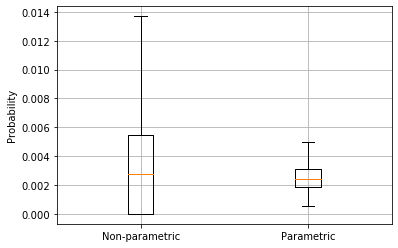

In [8]:
# Test sensitivity
parent_mean=np.mean(daily)
parent_std=np.std(daily)
p=stats.norm.sf(30,loc=parent_mean,scale=parent_std)
nsamps=1000
ninsamp=365
pemp=np.zeros(nsamps)*np.nan
ptheory=np.zeros(nsamps)*np.nan
for i in range(nsamps):
    samp=np.random.choice(np.squeeze(daily.values[:]), size=ninsamp, replace=True)
    pemp[i]=np.sum(samp>30)/np.float(ninsamp)   
    mu_samp=np.mean(samp)
    std_samp=np.std(samp)
    ptheory[i]=stats.norm.sf(30,loc=mu_samp,scale=std_samp)
fig,ax=plt.subplots(1,1)
b1=ax.boxplot([pemp,ptheory],showfliers=False)
ax.grid()
ax.set_xticklabels(["Non-parametric","Parametric"])
ax.set_ylabel("Probability")

* Q7. Approximately how much larger is the interquartile range for the non-parametric results? (Hint - the interquartile range is equal to the height of the box).  

## Wrap up

OK. Good job! That brings us to a close. To summarise, you used (1) a non-parametric and (2) a parametric method to estimate the expected number of extreme heat hazards in London. You did this by computing the probability of an event (daily maximum temperature exceeding 30$^{\circ}$C) in any one trial (day), before multiplying by the total number of trials (days). Whilst method (1) is very simple to apply, it does have its drawbacks. Method 2 is, by comparison, more robust to sampling error and capable of extrapolation. Although not touched on here, parametric methods do come with their own challenges -- not least figuring out which distribution should be used in the first place. Here you were told that the data were well described by a Normal distribution, but in the real world you would need to identify this yourself. In the next sessions we will explore datasets that follow different probability distributions. 

Please check your answers below and then attempt the further questions if you have time. 

## Answers

1. The probability of recording a heat hazard on any given day is 126/44,195 = 0.0029 = 0.29 %


2. The probabilty of a heat hazard on any one day is 0.0029. Given we have 10 x 365.25 trials, we would therefore expect 0.0029 x 365.25 x 10 = 10.4 events in a ten-year period (i.e., between one and two events per year). 


3. It is the Normal distribution


4. It shows the probability of *exceeding* $x$


5. Should expect 9 days


6. The return period is (approxiately) 223 years (1/p = approx 81584; divided by 365.25 = 223)


7. The interquartile range is approximately 5-6 times larger (the non-parametric box ranges from ~0-0.005; parametric ranges from 0.002-0.003)



## Further Questions


(1) In a 100-year series, only 5 years record a maximum temperature of at least 30$^{\circ}$C. What is the (non-parametric) estimate of the annual probability of at least one 'heat hazard'?

(2) Refer to the plot below (which shows the CDF and 1-CDF for daily maximum temperature in London). Approximately how many days with a maximum temperature above 20$^{\circ}$C should be expected in a year? (Remember to run the code to draw the plot!)

Text(0.5, 0, 'Daily maximum air temperatutre ($^{\\circ}$C)')

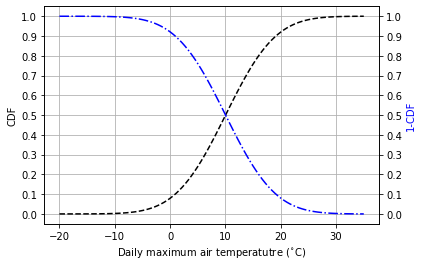

In [9]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches(6,4)
x=np.linspace(-20,35,100)
ref=stats.norm.cdf(x,loc=daily.mean(),scale=daily.std())
cdf=stats.norm.cdf(x,loc=daily.mean(),scale=daily.std())
ax.plot(x,ref,color='k',linestyle="--")
ax2=ax.twinx()
ax2.plot(x,1-cdf,linestyle="-.",color='blue')
ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax2.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.grid()
ax.set_ylabel("CDF")
ax2.set_ylabel("1-CDF",color='blue')
ax.set_xlabel("Daily maximum air temperatutre ($^{\circ}$C)")